In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torchvision
import os
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
images_path=os.getcwd()+'/drive/MyDrive/face categorise/images/'

In [ ]:
images_path

'/content/drive/MyDrive/face categorise/images/'

In [ ]:
data_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((240, 320)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(root=images_path+'train/',
                                                 transform=data_transforms)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8,
                                               shuffle=True, num_workers=1)

In [ ]:
class Net(torch.nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = torch.nn.Conv2d(3, 16, 5)
        self.pool1 = torch.nn.MaxPool2d(2, 2)
        self.conv2 = torch.nn.Conv2d(16, 32, 5)
        self.pool2 = torch.nn.MaxPool2d(2, 2)

        self.fc1 = torch.nn.Linear(32 * 57 * 77, 512)
        self.fc2 = torch.nn.Linear(512, 64)
        self.fc3 = torch.nn.Linear(64, 4)
        
    def forward(self, x):
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        x = self.pool2(x)
        #print(x.shape)
        x = x.view(-1, 32 * 57 * 77)
        #print(x.shape)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))

        x = self.fc3(x)

        return x

In [ ]:
net = Net().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

Epoch: 1;  Loss: 54.46365749835968
Epoch: 2;  Loss: 54.122506618499756
Epoch: 3;  Loss: 53.82802498340607
Epoch: 4;  Loss: 53.54972553253174
Epoch: 5;  Loss: 52.53368961811066
Epoch: 6;  Loss: 52.40655338764191
Epoch: 7;  Loss: 52.016241669654846
Epoch: 8;  Loss: 49.4315379858017
Epoch: 9;  Loss: 48.43127632141113
Epoch: 10;  Loss: 42.56417030096054
Epoch: 11;  Loss: 41.383586049079895
Epoch: 12;  Loss: 35.39993906021118
Epoch: 13;  Loss: 34.20720687508583
Epoch: 14;  Loss: 30.86858633160591
Epoch: 15;  Loss: 27.500390365719795
Epoch: 16;  Loss: 24.896740958094597
Epoch: 17;  Loss: 26.322807729244232
Epoch: 18;  Loss: 20.89750285446644
Epoch: 19;  Loss: 20.74223241582513
Epoch: 20;  Loss: 16.252299539744854
Epoch: 21;  Loss: 15.391226414591074
Epoch: 22;  Loss: 12.895679976791143
Epoch: 23;  Loss: 12.30884880758822
Epoch: 24;  Loss: 10.84088957682252
Epoch: 25;  Loss: 12.36134688090533
Epoch: 26;  Loss: 9.497529498301446
Epoch: 27;  Loss: 7.726876500993967
Epoch: 28;  Loss: 14.09730900

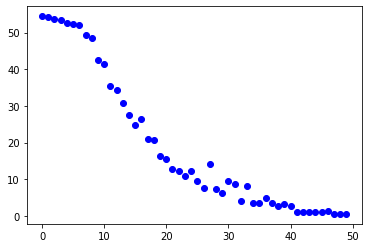

In [ ]:
 n_epochs = 30
 for epoch in range(n_epochs):
     # loss in this epoch
     running_loss = 0.0

     for inputs, labels in train_dataloader:        
         optimizer.zero_grad()
         outputs = net(inputs.to(device))
         loss = criterion(outputs, labels.to(device))
         loss.backward()
         optimizer.step()
         running_loss += loss.item()

     print(f'Epoch: {epoch + 1};  Loss: {running_loss}')
     plt.scatter(epoch,running_loss,color = 'blue')

 print('Finished Training')

In [ ]:
a = ['angry','happy','nutral','sad']
a

['angry', 'happy', 'nutral', 'sad']

In [ ]:
net.eval()

test_dataset = torchvision.datasets.ImageFolder(root=images_path + '/test',
                                                 transform=data_transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                               num_workers=1)

n_correct = 0
n_total = 0

result = []

with torch.no_grad():
    for data in test_dataloader:
      images, labels = data
      outputs = net(images.to(device))
      answer = a[int(torch.argmax(outputs))]
      answer = str(answer)
      result.append(answer)
    print(result)

['happy', 'happy', 'nutral', 'happy', 'nutral', 'nutral', 'sad', 'happy', 'sad', 'sad', 'nutral', 'sad', 'sad', 'sad', 'happy', 'nutral', 'angry', 'angry', 'nutral', 'happy', 'nutral', 'sad', 'sad', 'angry', 'nutral', 'angry', 'angry', 'nutral', 'nutral', 'nutral', 'nutral', 'sad', 'nutral', 'sad', 'sad', 'angry', 'happy', 'sad', 'nutral', 'sad', 'angry', 'nutral', 'nutral', 'happy', 'happy', 'happy', 'sad', 'happy', 'sad', 'nutral', 'happy', 'angry', 'sad', 'sad', 'sad', 'angry', 'happy', 'angry', 'happy', 'sad', 'nutral', 'angry', 'happy', 'angry', 'sad', 'happy', 'sad', 'nutral', 'nutral', 'angry', 'happy', 'nutral', 'happy', 'angry', 'sad', 'nutral', 'happy', 'angry', 'nutral', 'happy', 'angry', 'happy', 'happy', 'nutral', 'happy', 'sad', 'happy', 'happy', 'happy', 'happy', 'nutral', 'angry', 'nutral', 'nutral', 'happy', 'nutral', 'sad', 'angry', 'nutral', 'happy', 'happy', 'sad', 'sad', 'happy', 'nutral', 'happy', 'angry', 'sad', 'nutral', 'happy', 'nutral', 'nutral', 'sad', 'happ

In [ ]:
names=["id","expression"]
df_answer = pd.read_csv('/content/drive/MyDrive/face categorise/sample_submit.csv',names = names)
df_answer["expression"]=result
df_answer.to_csv('/content/drive/MyDrive/face categorise/MyAnswer4.csv',index=False,header=False)

In [ ]:
df_answer

,id,expression
0,test_0000.jpg,happy
1,test_0001.jpg,happy
2,test_0002.jpg,nutral
3,test_0003.jpg,happy
4,test_0004.jpg,nutral
...,...,...
307,test_0307.jpg,nutral
308,test_0308.jpg,sad
309,test_0309.jpg,happy
310,test_0310.jpg,angry
